# Pandas Series Creation and Indexing
### Use data from step tracking application to create a Pandas Series

**pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.<br>

**%matplotlib inline** Used to draw graphs in line
... there other like this for example: **%%time** to calculate how much time this cell used

In [1]:
# Here we will call all the library we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

**data:** array-like, Iterable, dict, or scalar value<br>
Contains data stored in Series. If data is a dict, argument order is maintained.<br>

**index:** array-like or Index (1d)<br>
Values must be hashable and have the same length as data. Non-unique index values are allowed. Will default to RangeIndex (0, 1, 2, …, n) if not provided. If data is dict-like and index is None, then the values in the index are used to reindex the Series after it is created using the keys in the data.<br>

**dtype:** str, numpy.dtype, or ExtensionDtype, optional <br>
Data type for the output Series. If not specified, this will be inferred from data. See the user guide for more usages.
<br>

**name:** str, optional <br>
The name to give to the Series.<br>

**copy:** bool, default False<br>
Copy input data.

Find more Here -> (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [2]:
step_data = [3620, 7891, 9761,3907, 4338, 5373]
step_counts = pd.Series(step_data,name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


### pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)

Return a fixed frequency DatetimeIndex.

**start**str or datetime-like, optional<br>
Left bound for generating dates.

**end** str or datetime-like, optional<br>
Right bound for generating dates.

**period** sint, optional<br>
Number of periods to generate.

**freq** str or DateOffset, default ‘D’<br>
Frequency strings can have multiples, e.g. ‘5H’.

**tz** str or tzinfo, optional<br>
Time zone name for returning localized DatetimeIndex, for example ‘Asia/Hong_Kong’. By default, the resulting DatetimeIndex is timezone-naive.

**normalize** bool, default False<br>
Normalize start/end dates to midnight before generating date range.

**name** str, default None<br>
Name of the resulting DatetimeIndex.

**closed** {None, ‘left’, ‘right’}, optional<br>
Make the interval closed with respect to the given frequency to the ‘left’, ‘right’, or both sides (None, the default).

**kwargs**
For compatibility. Has no effect on the result.

In [3]:
#Add a date range to the Series
step_counts.index = pd.date_range('20150329',periods = 6)
print(step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [4]:
# Select data by the index values
# Just like a dictionary
print(step_counts['2015-04-01'])

3907


In [5]:
# Or by index position—like an array
print(step_counts[3])

3907


In [6]:
# Select all of April
print(step_counts['2015-04'])

2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


# Pandas Data Types and Imputation

## Data types can be viewed and converted

### ndarray.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)¶

**dtype** str or dtype <br>
Typecode or data-type to which the array is cast.

**order** {‘C’, ‘F’, ‘A’, ‘K’}, optional<br>
Controls the memory layout order of the result. ‘C’ means C order, ‘F’ means Fortran order, ‘A’ means ‘F’ order if all the arrays are Fortran contiguous, ‘C’ order otherwise, and ‘K’ means as close to the order the array elements appear in memory as possible. Default is ‘K’.

**casting** {‘no’, ‘equiv’, ‘safe’, ‘same_kind’, ‘unsafe’}, optional<br>
Controls what kind of data casting may occur. Defaults to ‘unsafe’ for backwards compatibility.

+ ‘no’ means the data types should not be cast at all.

+ ‘equiv’ means only byte-order changes are allowed.

+ ‘safe’ means only casts which can preserve values are allowed.

+ ‘same_kind’ means only safe casts or casts within a kind, like float64 to float32, are allowed.

+ ‘unsafe’ means any data conversions may be done.

**subok** bool, optional<br>
If True, then sub-classes will be passed-through (default), otherwise the returned array will be forced to be a base-class array.

**copy** bool, optional<br>
By default, astype always returns a newly allocated array. If this is set to false, and the dtype, order, and subok requirements are satisfied, the input array is returned instead of a copy.

In [7]:
# View the data type
print(step_counts.dtypes)

# Convert to a float
step_counts = step_counts.astype(np.float)

# View the data type
print(step_counts.dtypes)

int64
float64


### Series.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
Fill NA/NaN values using the specified method.

**value** scalar, dict, Series, or DataFrame <br>
Value to use to fill holes (e.g. 0), alternately a dict/Series/DataFrame of values specifying which value to use for each index (for a Series) or column (for a DataFrame). Values not in the dict/Series/DataFrame will not be filled. This value cannot be a list.

**method** {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None <br>
Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

**axis** {0 or ‘index’}<br>
Axis along which to fill missing values.

**inplace** bool, default False<br>
If True, fill in-place. Note: this will modify any other views on this object (e.g., a no-copy slice for a column in a DataFrame).

**limit** int, default None<br>
If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill. In other words, if there is a gap with more than this number of consecutive NaNs, it will only be partially filled. If method is not specified, this is the maximum number of entries along the entire axis where NaNs will be filled. Must be greater than 0 if not None.

**downcast** dict, default is None<br>
A dict of item -> dtype of what to downcast if possible, or the string ‘infer’ which will try to downcast to an appropriate equal type (e.g. float64 to int64 if possible).

In [8]:
# Create invalid data
step_counts[1:3] = np.NaN

# Now fill it in with zeros
step_counts = step_counts.fillna(0.)

# equivalently,
# step_counts.fillna(0., inplace=True)
print(step_counts[1:3])

2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


# Pandas DataFrame Creation and Methods
## DataFrames can be created from lists, dictionaries, and Pandas Series

The **zip()** function takes iterables (can be zero or more), aggregates them in a tuple, and return it.<br>
The **list()** constructor returns a list in Python.
### class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.<br>
Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

**data** ndarray (structured or homogeneous), Iterable, dict, or DataFrame<br>
Dict can contain Series, arrays, constants, dataclass or list-like objects. If data is a dict, column order follows insertion-order.<br>

**index** Index or array-like<br>
Index to use for resulting frame. Will default to RangeIndex if no indexing information part of input data and no index provided.

**columns** Index or array-like<br>
Column labels to use for resulting frame. Will default to RangeIndex (0, 1, 2, …, n) if no column labels are provided.

**dtype** dtype, default None<br>
Data type to force. Only a single dtype is allowed. If None, infer.

**copy** bool, default False<br>
Copy data from inputs. Only affects DataFrame / 2d ndarray input.

In [9]:
# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3,10.9, 0, None]

# Create a tuple of data
joined_data = list(zip(step_data,cycling_data))

# The dataframe
activity_df = pd.DataFrame(joined_data)
print(activity_df)


      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [10]:
# Add column names to dataframe
activity_df = pd.DataFrame(joined_data, index=pd.date_range('20150329',periods=6), columns=['Walking','Cycling'])
print(activity_df)

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


### DataFrame.loc ... DataFrame.iloc
**DataFrame.loc** Access a group of rows and columns by label(s) or a boolean array.

**DataFrame.iloc** Purely integer-location based indexing for selection by position.

In [11]:
# Select row of data by index name
print(activity_df.loc['2015-04-01'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [12]:
# Select row of data by integer position
print(activity_df.iloc[-3])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [13]:
# Name of column
print(activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [14]:
# Object-oriented approach
print(activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [15]:
# First column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


# Reading Data with Pandas
### CSV and other common filetypes can be read with a single command

**read_csv()** is used to read csv formated file and return it as dataframe or textparser 

Check full Documentation (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)

In [16]:
# The location of the data file
filepath = 'data/Iris_Data.csv'

# Import the data
data = pd.read_csv(filepath)

# Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Assigning New Data to a DataFrame


In [17]:
# Create a new column that is a product
# of both measurements
data['sepal_area'] = data.sepal_length*data.sepal_width

# Print a few rows and columns
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


## Applying a Function to a DataFrame Column
## Functions can be applied to columns or rows of a DataFrame or Series
### apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)

Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**func** function <br>
Function to apply to each column or row.

**axis** {0 or ‘index’, 1 or ‘columns’}, default 0<br>
Axis along which the function is applied:

+ 0 or ‘index’: apply function to each column.
+ 1 or ‘columns’: apply function to each row.

**raw** bool, default False<br>
Determines if row or column is passed as a Series or ndarray object:

+ False : passes each row or column as a Series to the function.

+ True : the passed function will receive ndarray objects instead. If you are just applying a NumPy reduction function this will achieve much better performance.

**result_type** {‘expand’, ‘reduce’, ‘broadcast’, None}, default None<br>
These only act when axis=1 (columns):

+ ‘expand’ : list-like results will be turned into columns.

+ ‘reduce’ : returns a Series if possible rather than expanding list-like results. This is the opposite of ‘expand’.

+ ‘broadcast’ : results will be broadcast to the original shape of the DataFrame, the original index and columns will be retained.

The default behaviour (None) depends on the return value of the applied function: list-like results will be returned as a Series of those. However if the apply function returns a Series these are expanded to columns.

**args** tuple<br>
Positional arguments to pass to func in addition to the array/series.

****kwds**
Additional keyword arguments to pass as keywords arguments to func.

In [18]:
# The lambda function applies what
# follows it to each row of data

data['abbrev'] = (data.species.apply(lambda x:x.replace('Iris-','')))

# Note that there are other ways to
# accomplish the above
print(data.iloc[:5, -3:])


       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


## Concatenating Two DataFrames
### Two DataFrames can be concatenated along either dimension

In [19]:
# Concatenate the first two and
# last two rows

small_data = pd.concat([data.iloc[:2],data.iloc[-2:]])
print(small_data.iloc[:,-3:])

# See the 'join' method for
# SQL style joining of dataframes

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


## Aggregated Statistics with GroupBy
### Using the groupby method calculated aggregated DataFrame statistics

In [20]:
# Use the size method with a
# DataFrame to get count
# For a Series, use the .value_counts
# method

group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [21]:
# Mean calculated on a DataFrame
print(data.mean())

# Median calculated on a Series
print(data.petal_length.median())

# Mode calculated on a Series
print(data.petal_length.mode())


sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64


In [22]:
# Standard dev, variance, and SEM
print(data.petal_length.std(),
data.petal_length.var(),
data.petal_length.sem())

1.7644204199522617 3.1131794183445156 0.144064324021


In [23]:
# As well as quantiles
print(data.quantile(0))

sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


### describe() function in data frame
This function return 8 numbers for each coloumn <br>

**COUTN:** How many rows has non missing values <br>

**Mean:** Mean (average) 🤷‍<br>

**Std:** Stander deviation<br>

**min:** lowest number<br>

**25%** 25% of data lower than this value<br>

**50%**<br>

**75%**<br>

**Max:** Highest number<br>


In [24]:
print(data.describe()) 

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [25]:
# Sample 5 rows without replacement
sample = (data.sample(n=5,replace=False,random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


# Visualization Libraries
### Matplotlib 
### Pandas (via Matplotlib)
### Seaborn 
* Statistically-focused plotting methods
* Global preferences incorporated by Matplotlib

### matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

> **plot(x, y)**        # plot x and y using default line style and color <br>
> **plot(x, y, 'bo')**  # plot x and y using blue circle markers<br>
> **plot(y)**           # plot y using x as index array 0..N-1<br>
> **plot(y, 'r+')**     # ditto, but with red plusses<br>


**x, y** array-like or scalar<br>
The horizontal / vertical coordinates of the data points. x values are optional and default to range(len(y)).

Commonly, these parameters are 1D arrays.

They can also be scalars, or two-dimensional (in that case, the columns represent separate data sets).

These arguments cannot be passed as keywords.

**fmt** str, optional<br>
A format string, e.g. 'ro' for red circles. See the Notes section for a full description of the format strings.

Format strings are just an abbreviation for quickly setting basic line properties. All of these and more can also be controlled by keyword arguments.

This argument cannot be passed as keyword.

**data** indexable object, optional<br>
An object with labelled data. If given, provide the label names to plot in x and y.

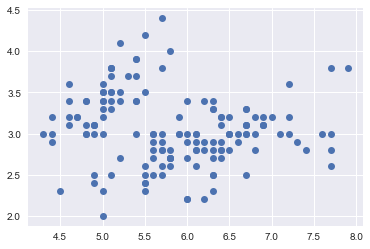

In [26]:
plt.plot(data.sepal_length,data.sepal_width,ls ='', marker='o');

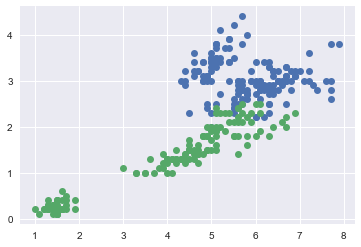

In [30]:
plt.plot(data.sepal_length,data.sepal_width,ls ='', marker='o',label='sepal');
plt.plot(data.petal_length,data.petal_width,ls ='', marker='o',label='petal');

## Histograms with Matplotlib
**adding the ; at the end of the line to prevent the annoying output data and just output the graph**

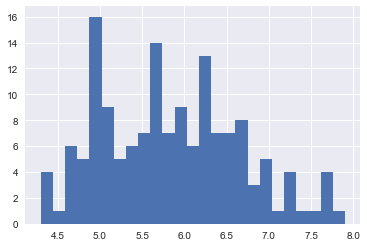

In [31]:
plt.hist(data.sepal_length, bins=25);

## Customizing Matplotlib Plots


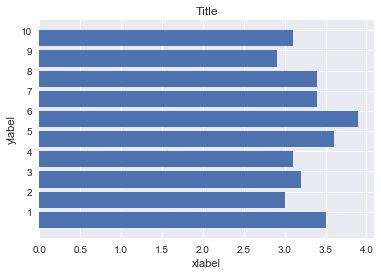

In [32]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),data.sepal_width.iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel',title='Title');

## Incorporating Statistical Calculations

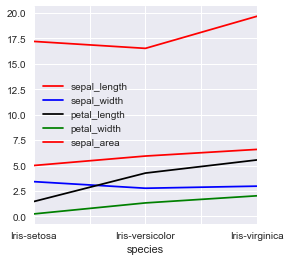

In [33]:
(data.groupby('species').mean().plot(color=['red','blue','black','green'],fontsize=10.0, figsize=(4,4)));

# Statistical Plotting with Seaborn

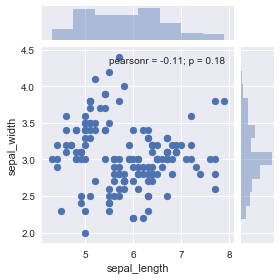

In [34]:
sns.jointplot(x='sepal_length',y='sepal_width',data=data, size=4);


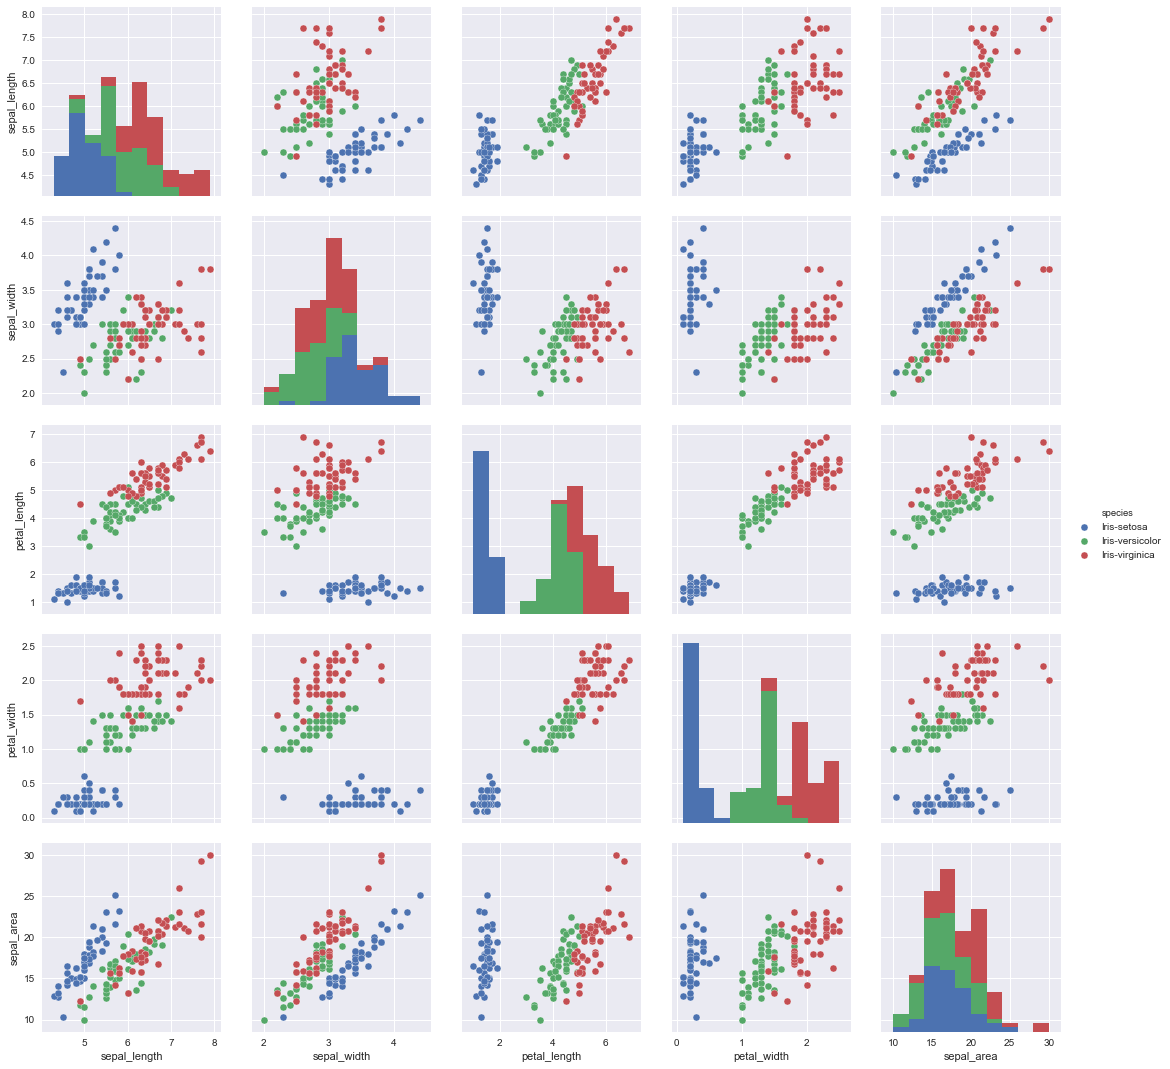

In [35]:
sns.pairplot(data, hue='species', size=3);